In [15]:
import pandas as pd
import seaborn as sns
%matplotlib inline

### Import dataframes

In [16]:
balt = pd.read_pickle('data/balt_comp.pk1')
bos = pd.read_pickle('data/bos_comp.pk1')
chi = pd.read_pickle('data/chi_comp.pk1')
nola = pd.read_pickle('data/nola_comp.pk1')
all_cities = pd.read_pickle('data/all_cities.pk1')

In [35]:
all_cities

,County,Year,Month,Crime Type,Crime Solved,Victim Count,date,None,D0,D1,D2,D3,D4
0,Baltimore City,2000,1,Murder or Manslaughter,No,1,2000-01-01,100.0,0.000,0.000,0.000,0.0,0.0
1,Baltimore City,2000,1,Murder or Manslaughter,Yes,1,2000-01-01,100.0,0.000,0.000,0.000,0.0,0.0
2,Baltimore City,2000,3,Murder or Manslaughter,No,1,2000-03-01,100.0,0.000,0.000,0.000,0.0,0.0
3,Baltimore City,2000,4,Murder or Manslaughter,Yes,1,2000-04-01,100.0,0.000,0.000,0.000,0.0,0.0
4,Baltimore City,2000,4,Murder or Manslaughter,No,1,2000-04-01,100.0,0.000,0.000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15372,Orleans Parish,2014,12,Murder or Manslaughter,No,0,2014-12-01,0.0,20.348,28.526,51.126,0.0,0.0
15373,Orleans Parish,2014,12,Murder or Manslaughter,No,0,2014-12-01,0.0,20.348,28.526,51.126,0.0,0.0
15374,Orleans Parish,2014,12,Murder or Manslaughter,No,0,2014-12-01,0.0,20.348,28.526,51.126,0.0,0.0
15375,Orleans Parish,2014,12,Murder or Manslaughter,No,0,2014-12-01,0.0,20.348,28.526,51.126,0.0,0.0


## First, let's see if there is any corellation to speak of

In [40]:
# Create a monthly aggregation of murder-level records
by_month = all_cities[['County', 'Year', "Month", "Victim Count"]].groupby(['County', 'Year', "Month"]).count()
dl = all_cities[['County', 'Year', "Month", 'None', 'D0', 'D1', 'D2', 'D3', 'D4']].groupby(['County', 'Year', "Month"]).mean()
by_month = by_month.merge(dl, left_on=['County', 'Year', 'Month'], right_on=['County', 'Year', 'Month'])

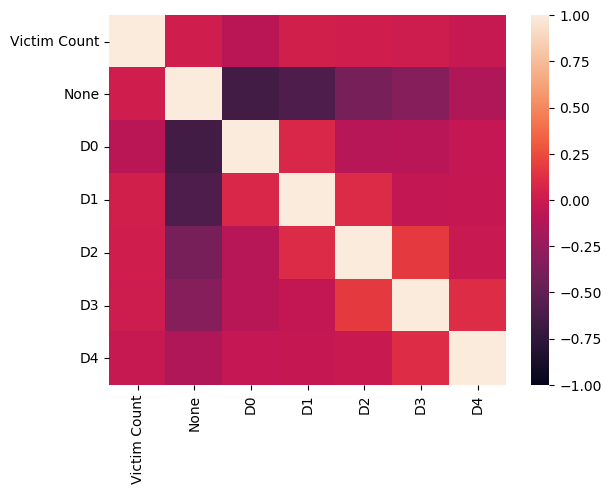

In [41]:
matrix = by_month.corr()
sns.heatmap(matrix, vmin=-1, vmax=1)

### For comparison purposes, we need a combined drought column

In [44]:
by_month['Total Drought'] = by_month.D0 + by_month.D1 + by_month.D2 + by_month.D3 + by_month.D4

### To reflect drought severity, we'll apply an arbitrary severity multiplier: D0=1, D1=2, D2=3, D3=4, D4=5

In [46]:
by_month['Weighted Drought'] = by_month.D0 + (by_month.D1*2) + (by_month.D2*3) + (by_month.D3*4) + (by_month.D4*5)

In [49]:
matrix2 = by_month.corr()
# sns.heatmap(matrix2, vmin=-1, vmax=1)
print(matrix2)

                  Victim Count      None        D0        D1        D2  \
Victim Count          1.000000  0.026339 -0.084708  0.036734  0.028558   
None                  0.026339  1.000000 -0.643434 -0.590090 -0.397063   
D0                   -0.084708 -0.643434  1.000000  0.079996 -0.094259   
D1                    0.036734 -0.590090  0.079996  1.000000  0.103621   
D2                    0.028558 -0.397063 -0.094259  0.103621  1.000000   
D3                    0.011191 -0.322563 -0.090958 -0.042198  0.173742   
D4                   -0.016746 -0.129734 -0.037869 -0.026545 -0.011464   
Total Drought        -0.026338 -1.000000  0.643434  0.590090  0.397064   
Weighted Drought      0.006325 -0.853236  0.219662  0.486015  0.569767   

                        D3        D4  Total Drought  Weighted Drought  
Victim Count      0.011191 -0.016746      -0.026338          0.006325  
None             -0.322563 -0.129734      -1.000000         -0.853236  
D0               -0.090958 -0.037869       

In [51]:
# export data with aggregate columns

by_month.to_pickle('data/by_month.pk1')

# Aw, Crap... We spent a week processing drought vs crime data and there is no discernable relationship!

### Quick, download some real estate data and see if we can come up with anything...

In [63]:
re_data = pd.read_pickle('../re_data/data/re_data.pk1')

In [64]:
# Incorporate drought data, add calculated columns

re_data = re_data.merge(dl, left_on=['County', 'Year', 'Month'], right_on=['County', 'Year', 'Month'])
re_data['Total Drought'] = re_data.D0 + re_data.D1 + re_data.D2 + re_data.D3 + re_data.D4
re_data['Weighted Drought'] = re_data.D0 + (re_data.D1*2) + (re_data.D2*3) + (re_data.D3*4) + (re_data.D4*5)

In [67]:
# Check that everything is in place...

for col in re_data.columns:
    print(col)

County
Year
Month
Existing
Homes_Sold
Homes_Sold_YoY
%_Sold_Is_New_Construction
Inventory
Inventory_YoY
%_Inventory_Is_New_Construction
New_Listings
New_Listings_YoY
Median_Sale_Price
Median_Sale_Price_YoY
Median_Ppsf
Median_Ppsf_YoY
Median_List_Price
Avg_Sale_To_List
Sold_Above_List
Months_Of_Supply
None
D0
D1
D2
D3
D4
Total Drought
Weighted Drought


## Ok, Hold your breath...

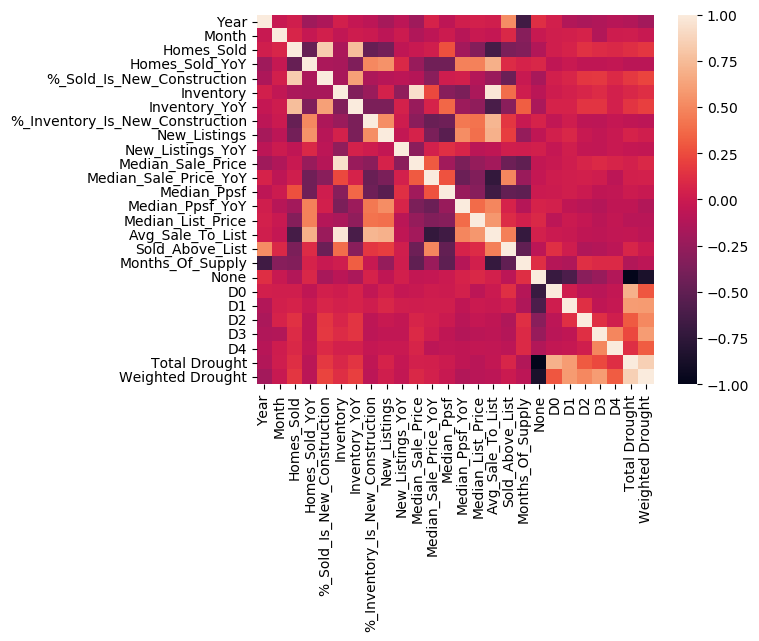

In [68]:
matrix3 = re_data.corr()
sns.heatmap(matrix3, vmin=-1, vmax=1)

## Ok, listen up... If you squint it looks like *maybe* drought correllates with slightly lower home prices, higher sales, and higher percent of new home sales? C'mon... help me out here...

In [69]:
# Aaaand... Export.

re_data.to_pickle('data/re_data_merged.pk1')